In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


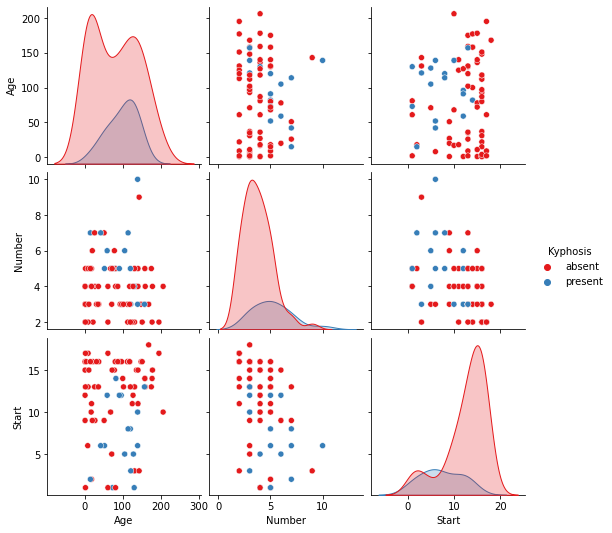

In [6]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('Kyphosis',axis=1)

y = df['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier()

In [11]:
dtree.fit(X_train,y_train) 

DecisionTreeClassifier()

In [12]:
predictions = dtree.predict(X_test)

In [13]:
 from sklearn.metrics import classification_report,confusion_matrix

In [14]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.80      0.84      0.82        19
     present       0.40      0.33      0.36         6

    accuracy                           0.72        25
   macro avg       0.60      0.59      0.59        25
weighted avg       0.70      0.72      0.71        25



[[16  3]
 [ 4  2]]


In [15]:
#TREE VISUALIZATION

In [16]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

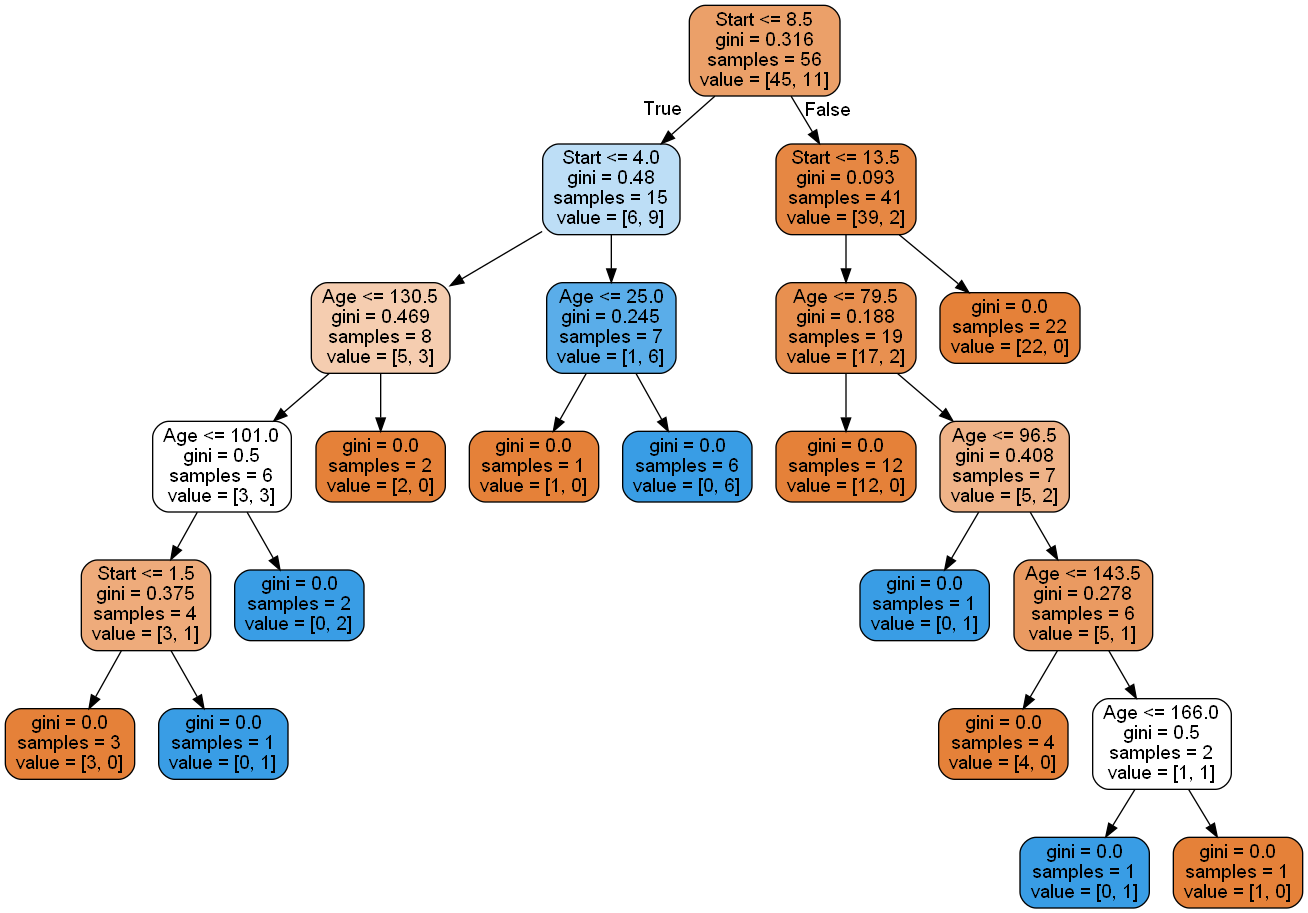

In [17]:
dot_data =  StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features,
               filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [18]:
#RANDOM FOREST

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfc = RandomForestClassifier(n_estimators=200)

In [21]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [22]:
 predrfc = rfc.predict(X_test)

In [23]:
print(classification_report(y_test,predrfc))
print('\n')
print(confusion_matrix(y_test,predrfc))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



[[19  0]
 [ 5  1]]


In [24]:
#Decision Trees and Random Forests Project

In [25]:
import numpy as np
import pandas as pd

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
%matplotlib inline

In [28]:
loans = pd.read_csv('loan_data.csv')
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [29]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


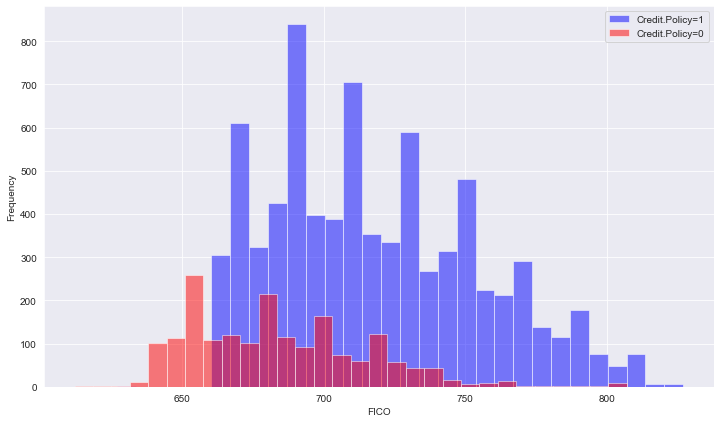

In [58]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,7))

loans[loans['credit.policy']==1]['fico'].plot.hist(bins=30,color='blue',alpha=0.5,
                                                   label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].plot.hist(bins=30,color='red',alpha=0.5,
                                                  label='Credit.Policy=0')

plt.xlabel('FICO')
plt.legend()

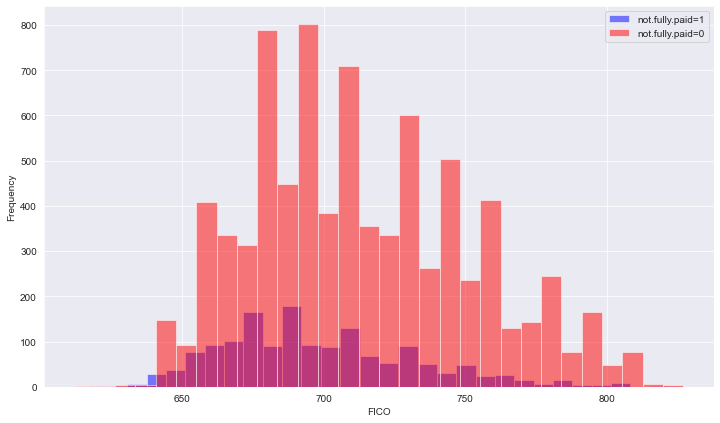

In [63]:
plt.figure(figsize=(12,7))

loans[loans['not.fully.paid']==1]['fico'].plot.hist(bins=30,alpha=0.5,
                            color='blue',label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].plot.hist(bins=30,alpha=0.5,
                            color='red',label='not.fully.paid=0')

plt.xlabel('FICO')
plt.legend()

<AxesSubplot:xlabel='purpose', ylabel='count'>

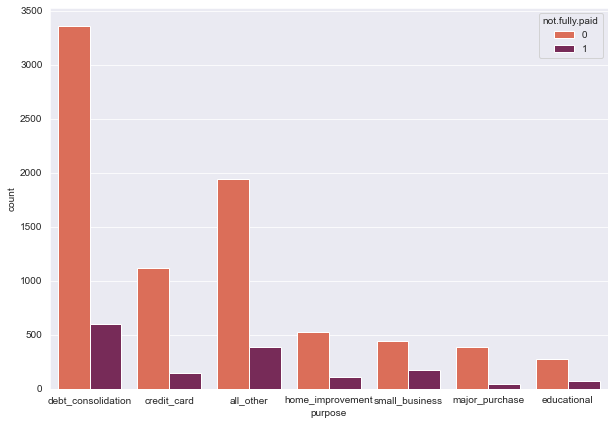

In [74]:
plt.figure(figsize=(10,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='rocket_r')

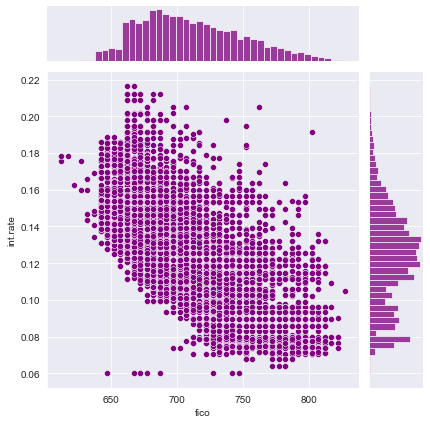

In [80]:
sns.jointplot(x=loans['fico'],y=loans['int.rate'],color='purple')

In [ ]:
Create the following lmplots to see 
if the trend differed between not.fully.paid and credit.policy. 
Check the documentation for lmplot() 
if you cant figure out how to separate it into columns ##

<Figure size 720x504 with 0 Axes>

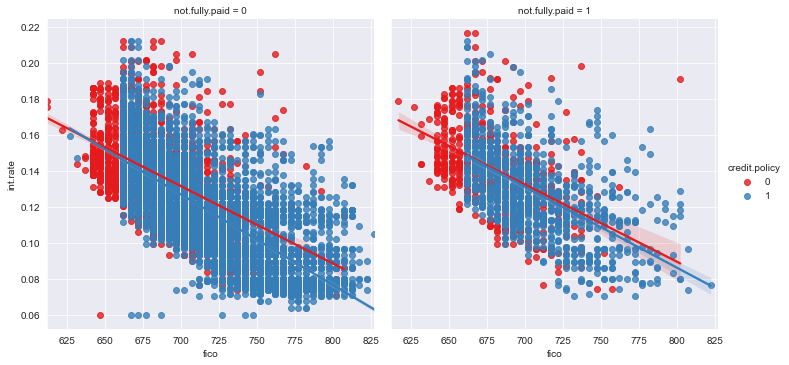

In [93]:
plt.figure(figsize=(10,7))

sns.lmplot(x='fico',y='int.rate',data=loans,
          hue='credit.policy',col='not.fully.paid',palette='Set1')

In [94]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [95]:
cat_feats = ['purpose']

In [96]:
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)

In [97]:
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [98]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [99]:
loans['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [104]:
X = final_data.drop('not.fully.paid', axis=1)

y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
dtc = DecisionTreeClassifier()

In [105]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [106]:
from sklearn.metrics import classification_report,confusion_matrix

In [107]:
pred_1 = dtc.predict(X_test)

In [108]:
print(classification_report(y_test,pred_1))
print(confusion_matrix(y_test,pred_1))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2408
           1       0.20      0.22      0.21       466

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.74      0.74      0.74      2874

[[2016  392]
 [ 365  101]]


In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
rfc = RandomForestClassifier()

In [111]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [112]:
pred_2 = rfc.predict(X_test)

In [113]:
print(classification_report(y_test,pred_2))
print(confusion_matrix(y_test,pred_2))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.38      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.61      0.51      0.47      2874
weighted avg       0.76      0.84      0.77      2874

[[2393   15]
 [ 457    9]]
